<a href="https://colab.research.google.com/github/Freddyx94/UE/blob/main/Navigating_the_Market_A_Data_Science_Approach_to_Stock_Prediction_Using_Dangote_Cement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dangote Cement Stock Price History Data Cleaning

# Tools: Python (Pandas, Numpy)

Import the neceassy libraries

In [88]:
import numpy as np
import pandas as pd

## Data Cleaning and Transformation

Step 1: Inspect The Dataset

In [89]:
# Dataset has been added as a file to google colab file section and ready to be exported.
# dataset has been downloaded from https://www.investing.com/equities/dangcem-historical-data with range 2021-2025

stock_price_history = pd.read_csv('Dangote Cement Stock Price History.csv')
print(stock_price_history.info())
print(stock_price_history.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      1217 non-null   object 
 1   Price     1217 non-null   float64
 2   Open      1217 non-null   float64
 3   High      1217 non-null   float64
 4   Low       1217 non-null   float64
 5   Vol.      1217 non-null   object 
 6   Change %  1217 non-null   object 
dtypes: float64(4), object(3)
memory usage: 66.7+ KB
None
         Date  Price   Open   High    Low     Vol. Change %
0  12/15/2025  614.9  614.9  614.9  614.9  506.27K    0.00%
1  12/12/2025  614.9  614.9  614.9  614.9  573.94K    0.00%
2  12/11/2025  614.9  614.9  614.9  614.9  281.94K    0.00%
3  12/10/2025  614.9  614.9  614.9  614.9  959.43K    0.00%
4  12/09/2025  614.9  614.9  614.9  614.9  738.17K    0.00%


Step 2:

Task:

Remove Duplicates

Handle Missing Values

Correct Data Types (Especially Dates and Numberics)

In [90]:
# Convert dates in dataset to regular date format
stock_price_history['Date'] = pd.to_datetime(stock_price_history['Date'], errors='coerce')
# Check perfection
print(stock_price_history.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1217 non-null   datetime64[ns]
 1   Price     1217 non-null   float64       
 2   Open      1217 non-null   float64       
 3   High      1217 non-null   float64       
 4   Low       1217 non-null   float64       
 5   Vol.      1217 non-null   object        
 6   Change %  1217 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 66.7+ KB
None


In [91]:
# Remove Duplicates and Handle Missing values in Dataset

In [92]:
# Remove Duplicates
stock_price_history.drop_duplicates(inplace=True)

In [93]:
# Handle Missing Values
stock_price_history.dropna(inplace=True)

In [94]:
print(stock_price_history.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1217 non-null   datetime64[ns]
 1   Price     1217 non-null   float64       
 2   Open      1217 non-null   float64       
 3   High      1217 non-null   float64       
 4   Low       1217 non-null   float64       
 5   Vol.      1217 non-null   object        
 6   Change %  1217 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 66.7+ KB
None


In [95]:
# Correct Data Types for 'Vol.' and 'Change %'

# Clean and convert 'Vol.' column
# Remove 'K' and 'M' and convert to numeric
def clean_volume(volume_str):
    if isinstance(volume_str, str):
        volume_str = volume_str.replace(',', '')
        if 'K' in volume_str:
            return float(volume_str.replace('K', '')) * 1000
        elif 'M' in volume_str:
            return float(volume_str.replace('M', '')) * 1000000
        else:
            return float(volume_str)
    return volume_str

stock_price_history['Vol.'] = stock_price_history['Vol.'].apply(clean_volume)

# Clean and convert 'Change %' column
# Remove '%' and convert to float
stock_price_history['Change %'] = stock_price_history['Change %'].str.replace('%', '', regex=False).astype(float)

# Check the updated data types and a sample of the cleaned data
print(stock_price_history.info())
print(stock_price_history.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1217 entries, 0 to 1216
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1217 non-null   datetime64[ns]
 1   Price     1217 non-null   float64       
 2   Open      1217 non-null   float64       
 3   High      1217 non-null   float64       
 4   Low       1217 non-null   float64       
 5   Vol.      1217 non-null   float64       
 6   Change %  1217 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 66.7 KB
None
        Date  Price   Open   High    Low      Vol.  Change %
0 2025-12-15  614.9  614.9  614.9  614.9  506270.0       0.0
1 2025-12-12  614.9  614.9  614.9  614.9  573940.0       0.0
2 2025-12-11  614.9  614.9  614.9  614.9  281940.0       0.0
3 2025-12-10  614.9  614.9  614.9  614.9  959430.0       0.0
4 2025-12-09  614.9  614.9  614.9  614.9  738170.0       0.0


Step 3:

Data Wrangling

Feature Engineering

Code Feature Engineering

Exploratory Data Analysis(EDA)

In [96]:
# 1. Dada Consistency

# Sort The Dataframe by 'Date' Column
stock_price_history.sort_values(by='Date', ascending=True, inplace=True)

# Set the 'Date column as index
stock_price_history.set_index('Date', inplace=True)

# Check the updated dataframe
print(stock_price_history.head())

            Price   Open   High    Low       Vol.  Change %
Date                                                       
2021-01-18  234.6  237.0  234.6  227.6  1170000.0     -1.01
2021-01-19  234.6  234.6  234.6  234.6   734190.0      0.00
2021-01-20  234.5  234.6  234.5  234.3  1750000.0     -0.04
2021-01-21  234.0  234.5  234.0  231.4   588080.0     -0.21
2021-01-22  234.0  234.0  234.0  234.0   186720.0      0.00


In [97]:
# 2. Feature Engineering
# Create feature that is the closing price from the day before
stock_price_history['Prev_Close'] = stock_price_history['Price'].shift(1)

# Calculate a short term Moving Average (one week)
stock_price_history['MA_7'] = stock_price_history['Price'].rolling(window=7).mean()

# Calculate a long term Moving Average (one month)
stock_price_history['MA_30'] = stock_price_history['Price'].rolling(window=30).mean()

# Calculate the daily return (Percentage change)
stock_price_history['Daily Return'] = stock_price_history['Price'].pct_change()
#calculate the difference between high and low price (range)
stock_price_history['Daily_Range'] = stock_price_history['High'] - stock_price_history['Low']

# We created new features such as MA, Prev_Close, Daily_Return etc., wthat have NaN values
#for the initial rows, we must drop them again
stock_price_history.dropna(inplace=True)

# Check the updated dataframe for the new features
print(stock_price_history.head())

            Price   Open   High    Low       Vol.  Change %  Prev_Close  \
Date                                                                      
2021-02-26  220.0  220.0  220.0  220.0   174980.0       0.0       220.0   
2021-03-01  220.0  220.0  220.0  220.0   275750.0       0.0       220.0   
2021-03-02  220.0  220.0  220.0  220.0   304390.0       0.0       220.0   
2021-03-03  220.0  220.0  220.0  220.0   699530.0       0.0       220.0   
2021-03-04  220.0  220.0  220.0  220.0  1180000.0       0.0       220.0   

             MA_7       MA_30  Daily Return  Daily_Range  
Date                                                      
2021-02-26  220.0  228.023333           0.0          0.0  
2021-03-01  220.0  227.536667           0.0          0.0  
2021-03-02  220.0  227.050000           0.0          0.0  
2021-03-03  220.0  226.566667           0.0          0.0  
2021-03-04  220.0  226.100000           0.0          0.0  


In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# 3. Explanatory Data Analysis (EDA)
# i. Descriptive Statistics

print(stock_price_history.describe().T)

               count           mean           std     min           25%  \
Price         1188.0     383.371296  1.504806e+02  204.00    265.000000   
Open          1188.0     382.973906  1.504102e+02  204.00    265.000000   
High          1188.0     379.133249  1.432797e+02  204.00    265.000000   
Low           1188.0     378.237037  1.426645e+02  198.10    265.000000   
Vol.          1188.0  734245.454545  4.532552e+06  680.00  40625.000000   
Change %      1188.0       0.107971  2.069549e+00  -10.00      0.000000   
Prev_Close    1188.0     383.038889  1.504049e+02  204.00    265.000000   
MA_7          1188.0     382.374074  1.498339e+02  209.50    266.428571   
MA_30         1188.0     379.006737  1.467704e+02  214.21    265.024167   
Daily Return  1188.0       0.001080  2.069560e-02   -0.10      0.000000   
Daily_Range   1188.0       0.896212  6.635054e+00    0.00      0.000000   

                        50%       75%           max  
Price            310.100000     480.0  7.6300

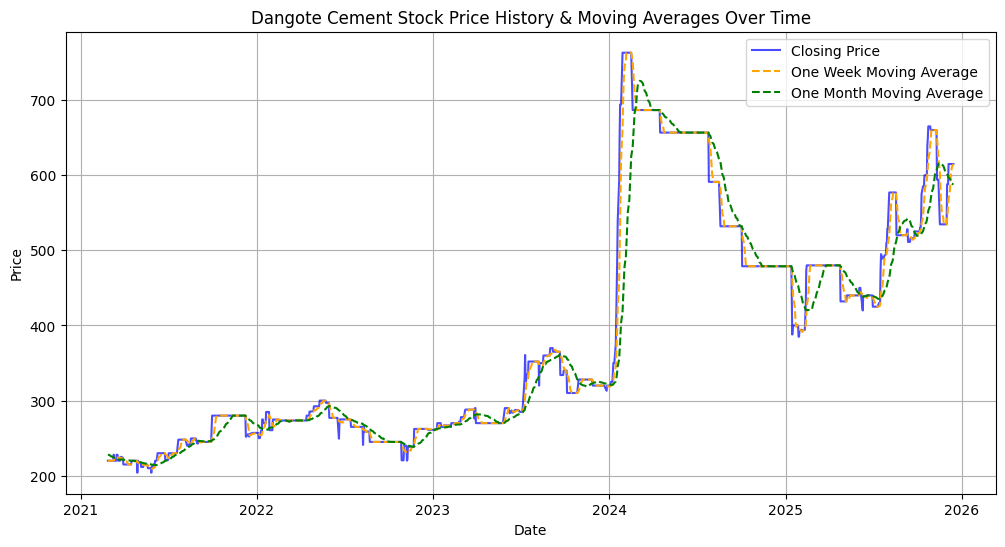

In [99]:
# ii. Visualize the Time series (Closing Price)
plt.figure(figsize=(12, 6))

# Plot the closing price and the Moving averages
plt.plot(stock_price_history.index, stock_price_history['Price'], label='Closing Price', alpha=0.7, color='blue')
plt.plot(stock_price_history.index, stock_price_history['MA_7'], label='One Week Moving Average', color='orange', linestyle='--')
plt.plot(stock_price_history.index, stock_price_history['MA_30'], label='One Month Moving Average', color='green', linestyle='--')

plt.title('Dangote Cement Stock Price History & Moving Averages Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


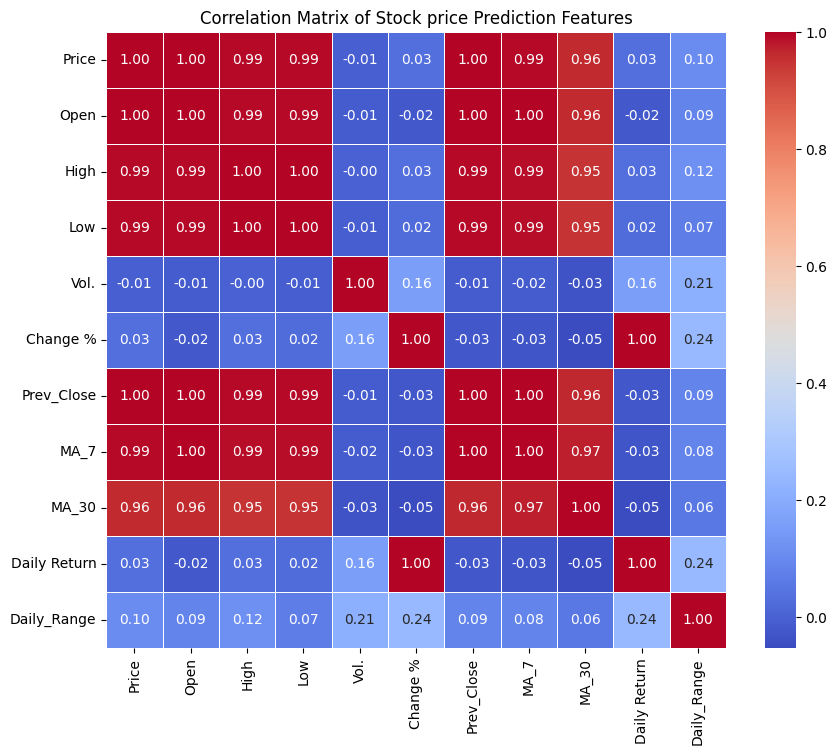

In [100]:
# iii. Correlation Analysis (Focusing on features related to price change)
# SOnly numerical colums will be selected for correlation
numerical_cols = stock_price_history.select_dtypes(include=np.number).columns
Correlation_matrix = stock_price_history[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(Correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Stock price Prediction Features')
plt.show()


Final Stage: Save the cleaned datset to csv file

In [101]:
# saving the Cleaned Data to CSV

# File name
csv_filename = 'dangcem_cleaned.csv'

# Save the Dataframe to a CSV file
stock_price_history.to_csv(csv_filename, index=True)

print(f"Dataframe saved to {csv_filename}")

Dataframe saved to dangcem_cleaned.csv
